Historical Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \

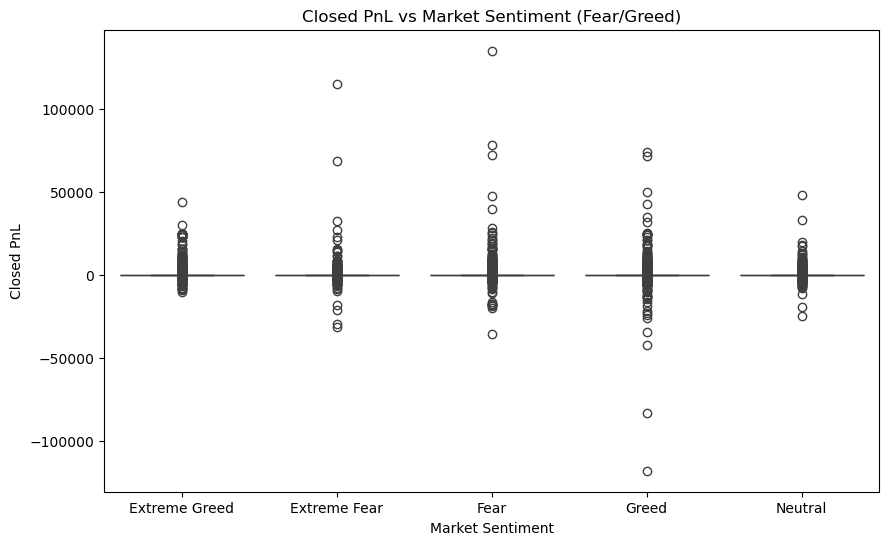

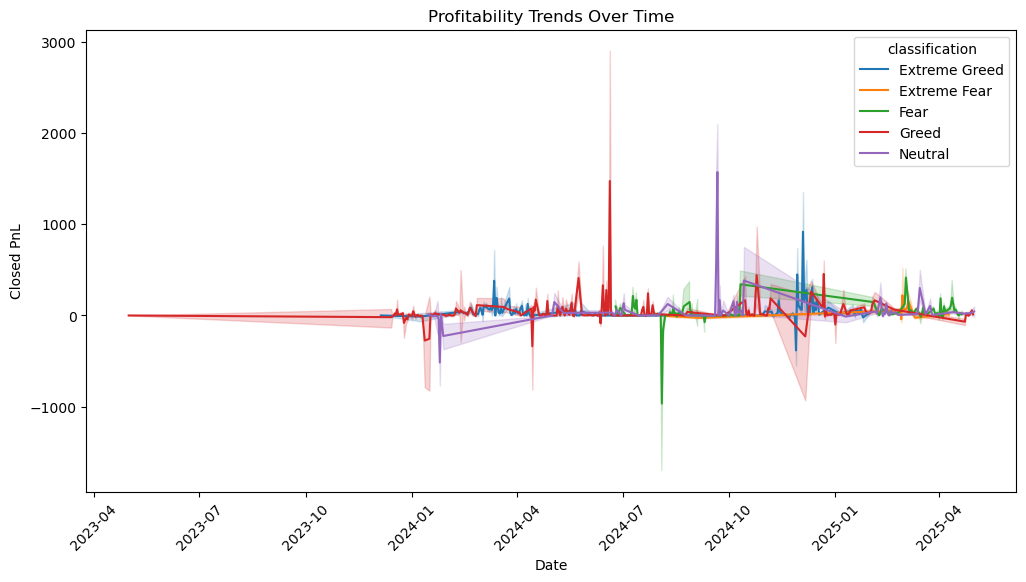

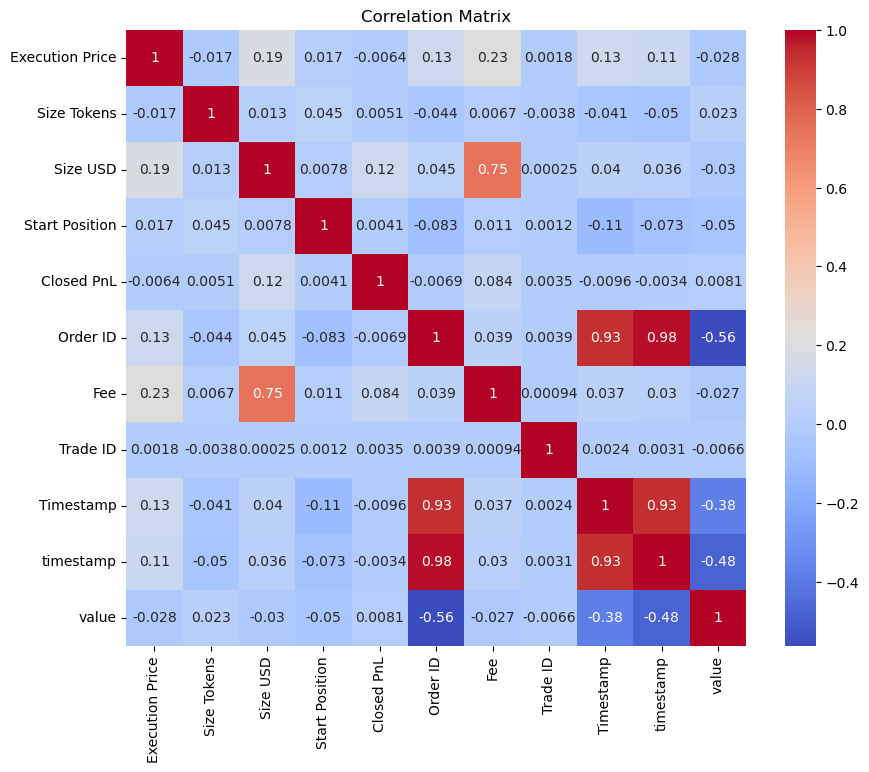


Processed data saved to 'csv_files/processed_data.csv'


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
historical_data = pd.read_csv('csv_files/historical_trader_data.csv')  # Replace with actual path
fear_greed_data = pd.read_csv('csv_files/fear_greed_index.csv')       # Replace with actual path

# Display the first few rows of each dataset
print("Historical Trader Data:")
print(historical_data.head())

print("\nFear & Greed Index Data:")
print(fear_greed_data.head())

# Check column names in both datasets
print("Columns in Historical Trader Data:", historical_data.columns)
print("Columns in Fear & Greed Index Data:", fear_greed_data.columns)

# Rename columns if necessary
if 'date' in fear_greed_data.columns:
    fear_greed_data.rename(columns={'date': 'Date'}, inplace=True)

# Create a 'Date' column in historical_data from 'Timestamp IST'
if 'Timestamp IST' in historical_data.columns:
    historical_data['Date'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Ensure the 'Date' column is in the same format
fear_greed_data['Date'] = pd.to_datetime(fear_greed_data['Date']).dt.date

# Exploratory Data Analysis (EDA) on Historical Trader Data
print("\nSummary Statistics for Historical Trader Data:")
print(historical_data.describe())

# Check for missing values
print("\nMissing Values in Historical Trader Data:")
print(historical_data.isnull().sum())

# Exploratory Data Analysis (EDA) on Fear & Greed Index Data
print("\nSummary Statistics for Fear & Greed Index Data:")
print(fear_greed_data.describe())

print("\nMissing Values in Fear & Greed Index Data:")
print(fear_greed_data.isnull().sum())

# Merge the datasets on the 'Date' column
merged_data = pd.merge(historical_data, fear_greed_data, on='Date', how='inner')

# Display the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())

# Analyze the relationship between leverage and market sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_data)
plt.title('Closed PnL vs Market Sentiment (Fear/Greed)')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.savefig('outputs/leverage_vs_sentiment.png')  # Save the plot
plt.show()

# Analyze profitability trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Closed PnL', hue='classification', data=merged_data)
plt.title('Profitability Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.savefig('outputs/profitability_trends.png')  # Save the plot
plt.show()

# Correlation analysis
# Select only numeric columns for correlation calculation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('outputs/correlation_matrix.png')  # Save the plot
plt.show()

# Save processed data to CSV
merged_data.to_csv('csv_files/processed_data.csv', index=False)
print("\nProcessed data saved to 'csv_files/processed_data.csv'")